In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from hw_kernels import SVR, RBF, Polynomial, \
    KernelizedRidgeRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("housing2r.csv")

In [3]:
X = df[["RM","AGE","DIS","RAD","TAX"]].to_numpy()
y = np.transpose(df[["y"]].to_numpy())[0]

scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
rmses = {}
rmses["krr"] = {}
rmses["svr"] = {}
rmses["krr"]["M"] = {}
rmses["krr"]["M"]["normal_lambda"] = {}
rmses["krr"]["M"]["cv_lambda"] = {}
rmses["svr"]["M"] = {}
rmses["svr"]["M"]["normal_lambda"] = {}
rmses["svr"]["M"]["cv_lambda"] = {}
rmses["krr"]["sigma"] = {}
rmses["krr"]["sigma"]["normal_lambda"] = {}
rmses["krr"]["sigma"]["cv_lambda"] = {}
rmses["svr"]["sigma"] = {}
rmses["svr"]["sigma"]["normal_lambda"] = {}
rmses["svr"]["sigma"]["cv_lambda"] = {}

df_results = pd.DataFrame(columns=["model", "feature_type", "feature_value", "lambda_type", "lambda_value", "rmse"])

In [ ]:


for M in np.arange(1.0, 10.0, 0.5):
    print(M)
    
    bestRMSE = 99999999999999999999
    bestLambda = -1
    for cv_lambda in [0, 0.1, 1, 5, 10, 100, 1000, 10000]:
        kf = KFold(4)
        err_squares = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            krr_p = KernelizedRidgeRegression(kernel=Polynomial(M=M), lambda_=cv_lambda)
            krr_p.fit(X_train, y_train)
            err_squares.extend(np.square(krr_p.predict(X_test) - y_test))
        rmse = np.sqrt(np.average(err_squares))
        if rmse < bestRMSE:
            bestRMSE = rmse
            bestLambda = cv_lambda

    krr_p = KernelizedRidgeRegression(kernel=Polynomial(M=M), lambda_=1)
    krr_p.fit(X_train, y_train)
    rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
    rmses["krr"]["M"]["normal_lambda"][M] = rmse
    df_results.loc[len(df_results.index)] = ["krr", "M", M, "normal_lambda", 1, rmse]


    print("Best CV lambda", bestLambda)
    krr_p = KernelizedRidgeRegression(kernel=Polynomial(M=M), lambda_=bestLambda)
    krr_p.fit(X_train, y_train)
    rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
    rmses["krr"]["M"]["cv_lambda"][M] = rmse
    df_results.loc[len(df_results.index)] = ["krr", "M", M, "cv_lambda", bestLambda, rmse]


In [ ]:


for M in np.arange(1.5, 10.0, 0.5):
    print(M)
    krr_p = SVR(kernel=Polynomial(M=M), lambda_=1, epsilon=1)
    krr_p.fit(X_train, y_train)
    rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
    rmses["svr"]["M"]["normal_lambda"][M] = rmse
    df_results.loc[len(df_results.index)] = ["svr", "M", M, "normal_lambda", 1, rmse]

    bestRMSE = 99999999999999999999
    bestLambda = -1
    for cv_lambda in [0, 0.1, 1, 5, 10, 100, 1000, 10000]:
        kf = KFold(4)
        err_squares = []
        try:
            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                krr_p = SVR(kernel=Polynomial(M=M), lambda_=cv_lambda, epsilon=1)
                krr_p.fit(X_train, y_train)
                err_squares.extend(np.square(krr_p.predict(X_test) - y_test))
            rmse = np.sqrt(np.average(err_squares))
            if rmse < bestRMSE:
                bestRMSE = rmse
                bestLambda = cv_lambda
        except:
            pass
    print("Best CV lambda", bestLambda)
    try:
        krr_p = SVR(kernel=Polynomial(M=M), lambda_=bestLambda, epsilon=1)
        krr_p.fit(X_train, y_train)
        rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
        rmses["svr"]["M"]["cv_lambda"][M] = rmse
        df_results.loc[len(df_results.index)] = ["svr", "M", M, "cv_lambda", bestLambda, rmse]
    except:
        print("SVR failed at", M)

In [ ]:


for sigma in np.arange(1, 100, 4):

    krr_p = KernelizedRidgeRegression(kernel=RBF(sigma=sigma), lambda_=1)
    krr_p.fit(X_train, y_train)
    rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
    rmses["krr"]["sigma"]["normal_lambda"][sigma] = rmse
    df_results.loc[len(df_results.index)] = ["krr", "sigma", sigma, "normal_lambda", 1, rmse]


    bestRMSE = 99999999999999999999
    bestLambda = -1
    for cv_lambda in [0, 0.1, 1, 5, 10, 100, 1000, 10000]:
        kf = KFold(4)
        err_squares = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            krr_p = KernelizedRidgeRegression(kernel=RBF(sigma=sigma), lambda_=cv_lambda)
            krr_p.fit(X_train, y_train)
            err_squares.extend(np.square(krr_p.predict(X_test) - y_test))
        rmse = np.sqrt(np.average(err_squares))
        if rmse < bestRMSE:
            bestRMSE = rmse
            bestLambda = cv_lambda
    
    krr_p = KernelizedRidgeRegression(kernel=RBF(sigma=sigma), lambda_=bestLambda)
    krr_p.fit(X_train, y_train)
    rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
    rmses["krr"]["sigma"]["cv_lambda"][sigma] = rmse
    df_results.loc[len(df_results.index)] = ["krr", "sigma", sigma, "cv_lambda", bestLambda, rmse]

In [ ]:


for sigma in np.arange(0, 1.0, 0.01):
    try:
        krr_p = SVR(kernel=RBF(sigma=sigma), lambda_=1, epsilon=0.00001)
        krr_p.fit(X_train, y_train)
        rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
        rmses["svr"]["sigma"]["normal_lambda"][sigma] = rmse
        df_results.loc[len(df_results.index)] = ["svr", "sigma", sigma, "normal_lambda", 1, rmse]
    except:
        print("SVR failed at", sigma)

    bestRMSE = 99999999999999999999
    bestLambda = -1
    for cv_lambda in [0, 0.1, 1, 5, 10, 100, 1000, 10000]:
        kf = KFold(4)
        err_squares = []
        try:
            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                krr_p = SVR(kernel=RBF(sigma=sigma), lambda_=cv_lambda, epsilon=0.00001)
                krr_p.fit(X_train, y_train)
                err_squares.extend(np.square(krr_p.predict(X_test) - y_test))
            rmse = np.sqrt(np.average(err_squares))
            if rmse < bestRMSE:
                bestRMSE = rmse
                bestLambda = cv_lambda
        except:
            pass
    print("Best CV lambda", bestLambda)
    try:
        krr_p = SVR(kernel=RBF(sigma=sigma), lambda_=bestLambda, epsilon=0.00001)
        krr_p.fit(X_train, y_train)
        rmse = np.sqrt(np.average(np.square(krr_p.predict(X_test) - y_test)))
        rmses["svr"]["sigma"]["cv_lambda"][M] = rmse
        df_results.loc[len(df_results.index)] = ["svr", "sigma", sigma, "cv_lambda", bestLambda, rmse]
    except:
        print("SVR failed at", sigma)

In [10]:
for model in ["krr", "svr"]:
    for feature in ["M", "sigma"]:
        for lambdaType in ["normal_lambda", "cv_lambda"]:
            plt.plot(rmses[model][feature][lambdaType].keys(), rmses[model][feature][lambdaType].values())
        plt.title(f"{model} rmse with different values of {feature}")
        plt.show()

NameError: name 'rmses' is not defined

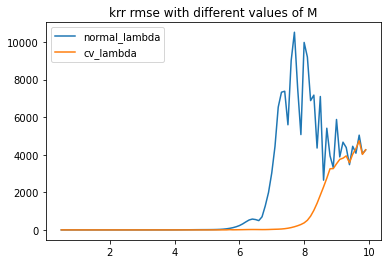

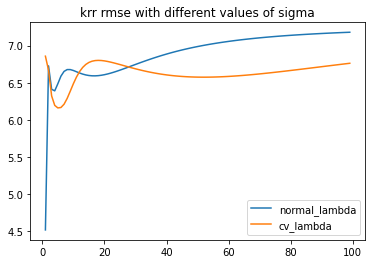

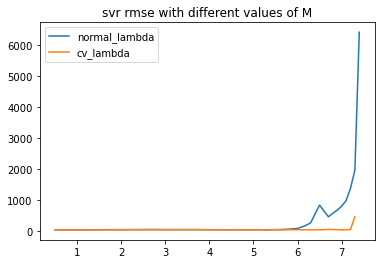

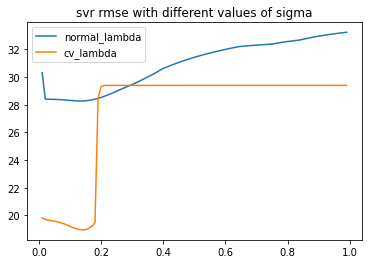

In [9]:
df = pd.read_csv("results.csv", index_col="index")
for model in ["krr", "svr"]:
    df_model = df[df["model"] == model]
    for feature in ["M", "sigma"]:
        df_feature = df_model[df_model["feature_type"] == feature]
        for lambdaType in ["normal_lambda", "cv_lambda"]:
            df_rmse = df_feature[df_feature["lambda_type"] == lambdaType]

            plt.plot(df_rmse["feature_value"].values, df_rmse["rmse"].values, label=lambdaType)
        plt.title(f"{model} rmse with different values of {feature}")
        plt.legend()
        plt.show()